# Image Enhancement

##### Import libraries

In [75]:
import numpy as np
from PIL import Image,ImageEnhance
import matplotlib.pylab as pylab
from skimage import img_as_ubyte,img_as_float

In [33]:
from skimage.io import imread

##### Log transform

In [9]:
im = Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/dog.jpg')

im_r,im_g,im_b = im.split()
pylab.style.use('ggplot')

In [35]:
# function for ploting the images and histogram

def plot_image(image,title=''): # image 
    pylab.imshow(image)
    pylab.title(title,size=20)
    
    
def plot_hist(r,g,b,title=''): # histogram of the image
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color='r',alpha=0.5)# ravel flatten the array to 1D
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color='g',alpha=0.5)
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color='b',alpha=0.5)
    pylab.xlabel('pixel value'),pylab.ylabel('freequency')
    pylab.title(title,size=20)


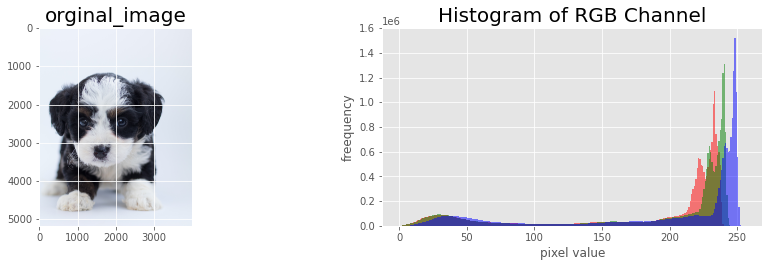

In [36]:
#orginal image and  its histogram
fig = pylab.figure(figsize=(15,8)) 
pylab.subplot(321), plot_image(im,'orginal_image')
pylab.subplot(322), plot_hist(im_r,im_g,im_b,'Histogram of RGB Channel')
pylab.show()

In [37]:
# log transform and its histogram

log_im = im.point(lambda x : 255*(np.log(1+x/255)))
log_im_r,log_im_g,log_im_b = log_im.split()

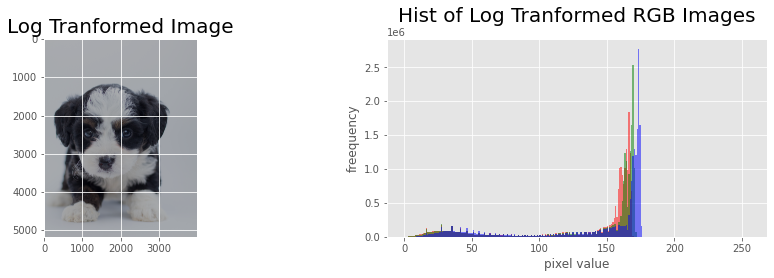

In [38]:
fig = pylab.figure(figsize=(15,8)) 
pylab.subplot(323),plot_image(log_im,"Log Tranformed Image")
pylab.subplot(324),plot_hist(log_im_r,log_im_g,log_im_b,"Hist of Log Tranformed RGB Images")
pylab.show()

##### Power-law transform

In [59]:
img_t = img_as_float(imread('C:/Users/Subitha/Desktop/CV Lab1/images/dog.jpg'))
gamma=5
img_pow = img_t**gamma

In [60]:
pylab.style.use('ggplot')

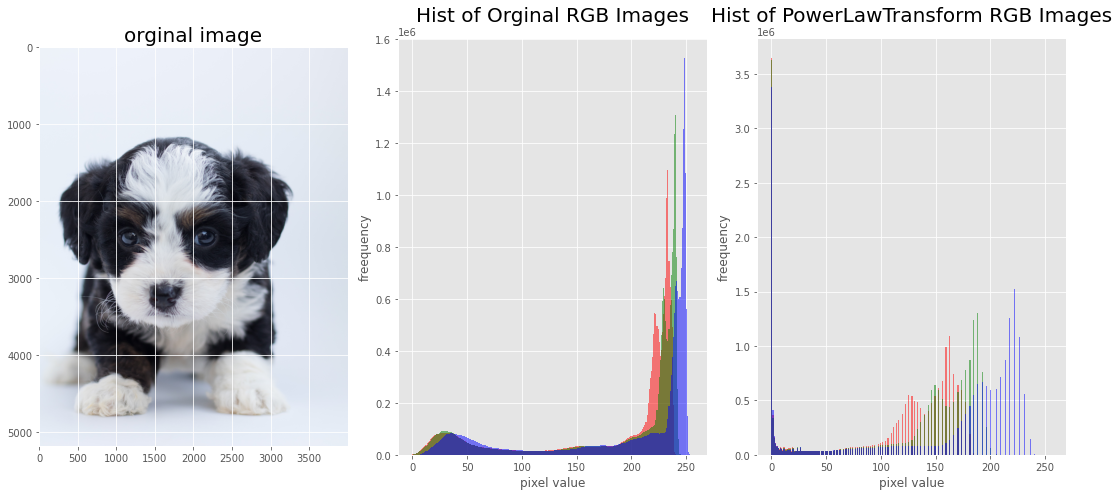

In [61]:
fig = pylab.figure(figsize=(15,7))
pylab.subplot(131),plot_image(img_t,'orginal image')
pylab.subplot(132),plot_hist(img_t[...,0],img_t[...,1],img_t[...,2],'Hist of Orginal RGB Images')
pylab.subplot(133),plot_hist(img_pow[...,0],img_pow[...,1],img_pow[...,2],'Hist of PowerLawTransform RGB Images')
pylab.tight_layout()

##### Contrast stretching with PIL as a point operation

In [63]:
imf = Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/yellow_flower.jpg')
imf_r,imf_g,imf_b = im.split()

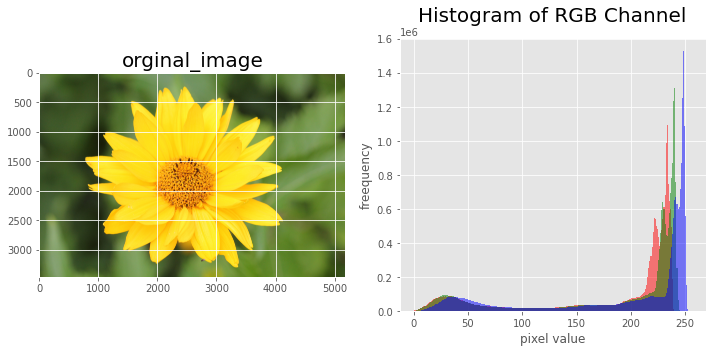

In [67]:
#orginal
fig = pylab.figure(figsize=(10,5))
pylab.subplot(121), plot_image(imf,'orginal_image')
pylab.subplot(122), plot_hist(imf_r,imf_g,imf_b,'Histogram of RGB Channel')
pylab.tight_layout()
pylab.show()

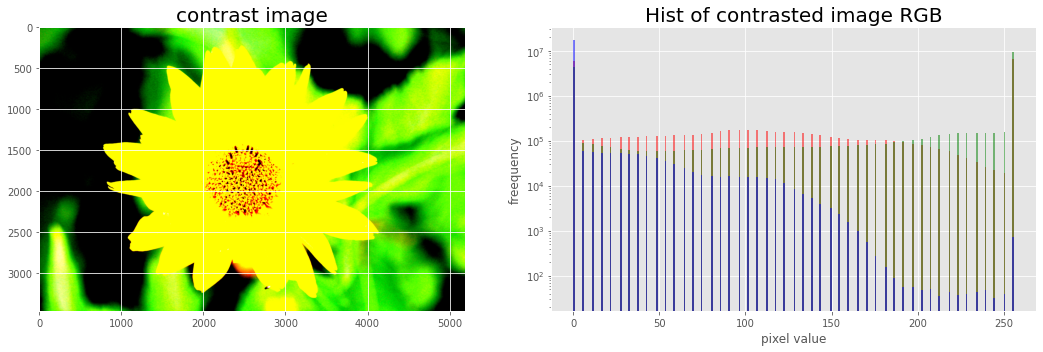

In [77]:
def contrast(c):
    return 0 if c < 70 else (255 if c > 150 else (255*c - 22950) / 48) # piece-wise linear function

im1 = imf.point(contrast)
im_r, im_g, im_b= im1.split()

pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121),plot_image(im1,'contrast image')
pylab.subplot(122),plot_hist(im_r, im_g, im_b,'Hist of contrasted image RGB')
pylab.tight_layout()
pylab.yscale('log')
pylab.show()

##### Contrast stretching Using the PIL ImageEnhance module

In [81]:
# Creating object of Contrast class

"""contrast = ImageEnhance.Contrast(imf)
im1 = np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (imf.height, imf.width, 4)) 
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im1)
pylab.subplot(122), plot_hist(im1[...,0], im1[...,1], im1[...,2]), pylab.yscale('log',basey=10)
pylab.show()"""

##### Thresholding With a fixed threshold

In [93]:
img_dog = Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/dog.jpg')

In [94]:
imd = img_dog.convert('L')

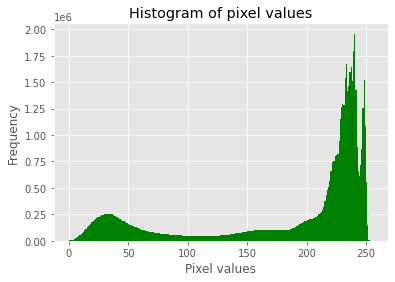

In [97]:
pylab.hist(np.array(im).ravel(),bins=256,range=(0,256),color="g")

pylab.title('Histogram of pixel values')
pylab.xlabel('Pixel values')
pylab.ylabel('Frequency')
pylab.show()

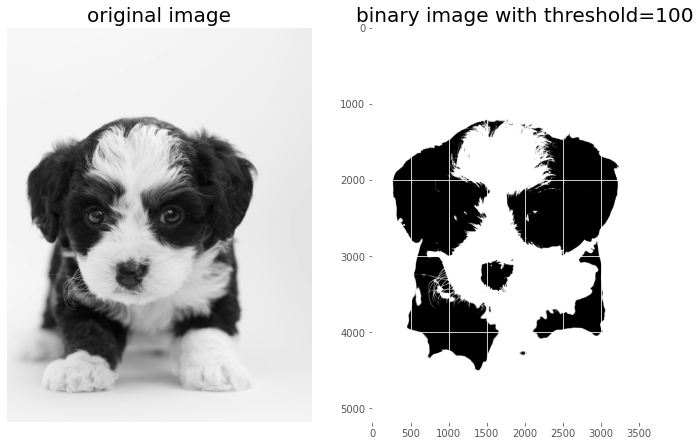

In [114]:
pylab.figure(figsize=(12,18))
pylab.gray()
pylab.subplot(221), plot_image(im, 'original image'), pylab.axis('off')
th = [0, 50, 100, 150, 200]

im1 = im.point(lambda x: x > th[2])
pylab.subplot(2,2,2),plot_image(im1, 'binary image with threshold=' + str(th[2]))
pylab.show()

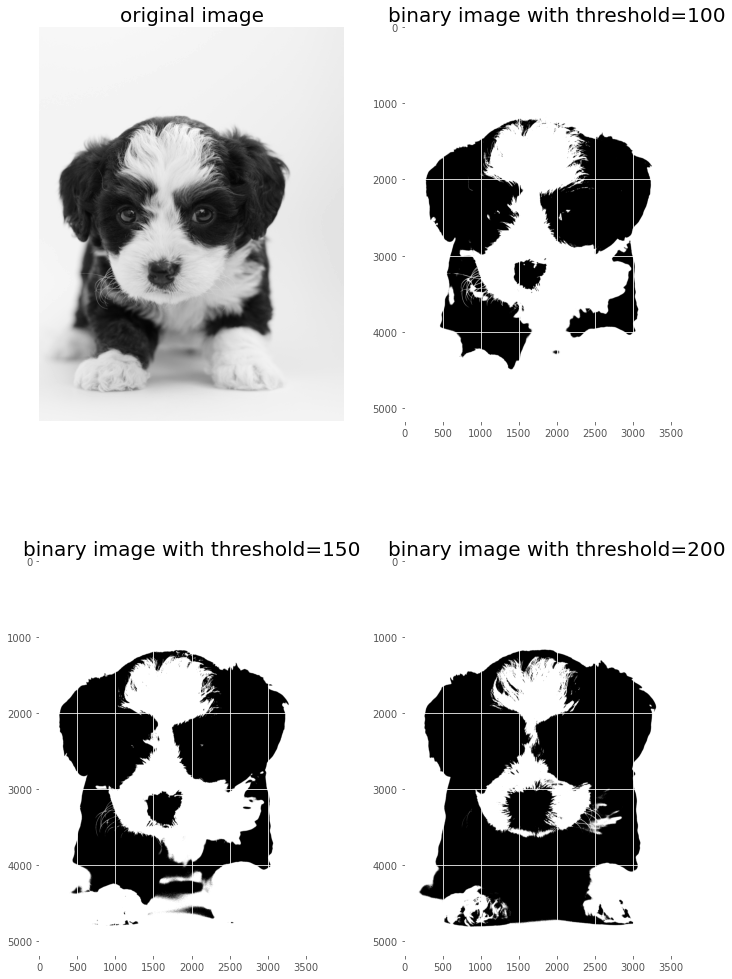

In [113]:
pylab.figure(figsize=(12,18))
pylab.gray()
pylab.subplot(221), plot_image(im, 'original image'), pylab.axis('off')
th = [0, 50, 100, 150, 200]
for i in range(2, 5):
    im1 = im.point(lambda x: x > th[i])
    pylab.subplot(2,2,i), plot_image(im1, 'binary image with threshold=' + str(th[i]))
pylab.show()

##### Half-toning

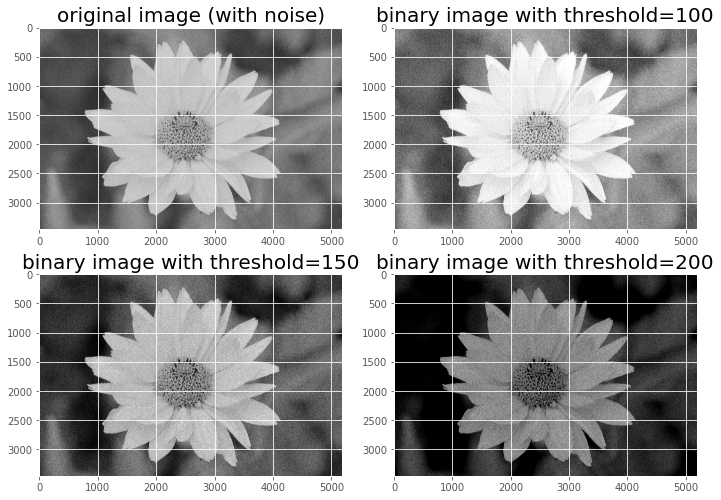

In [119]:
im = Image.open('C:/Users/Subitha/Desktop/CV Lab1/images/yellow_flower.jpg').convert('L')
im = Image.fromarray(np.clip(im + np.random.randint(-128, 128, (im.height, im.width)), 0, 255).astype(np.uint8))


pylab.figure(figsize=(10,7))
pylab.subplot(221), plot_image(im, 'original image (with noise)')

th = [0, 50, 100, 150, 200]
for i in range(2, 5):
    im1 = im.point(lambda x: x > th[i])
    pylab.subplot(2,2,i), plot_image(im1, 'binary image with threshold=' +   str(th[i]))
pylab.tight_layout()
pylab.show()